1] Z test


2] T-test


3] ANNOVA Test


Used  IRIS dataset to perform above tests using user defined functions. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df=pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<ipython-input-38-30f60815575f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SepalLengthCm'])


<Axes: xlabel='SepalLengthCm', ylabel='Density'>

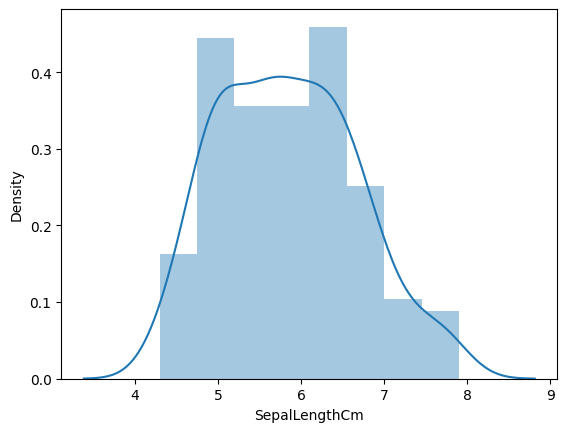

In [ ]:
sns.distplot(df['SepalLengthCm'])

<ipython-input-39-63660228aab2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SepalWidthCm'])


<Axes: xlabel='SepalWidthCm', ylabel='Density'>

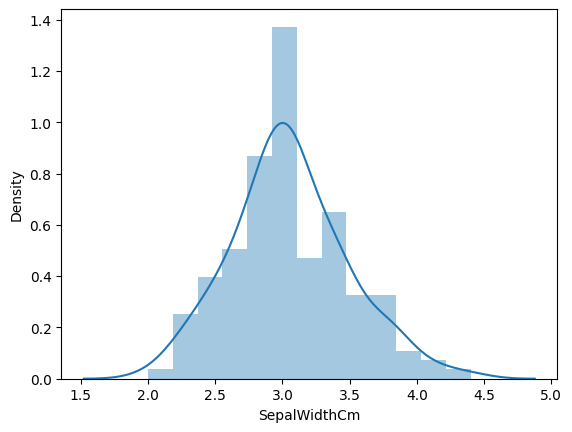

In [ ]:
sns.distplot(df['SepalWidthCm'])

<ipython-input-40-b9c3135d62e2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PetalLengthCm'])


<Axes: xlabel='PetalLengthCm', ylabel='Density'>

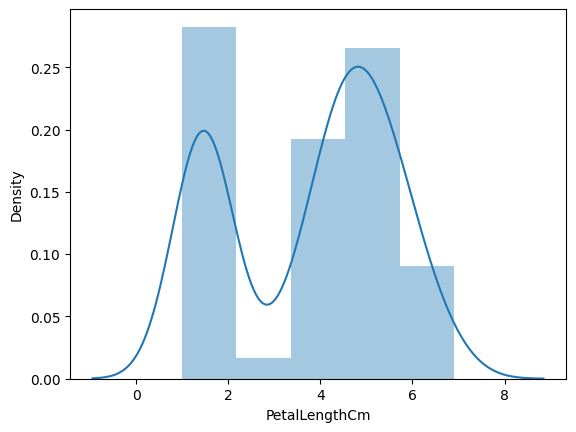

In [ ]:
sns.distplot(df['PetalLengthCm'])

In [ ]:
# Define user-defined functions for statistical tests
def z_test(sample_data, population_mean, population_std):
    n = len(sample_data)
    z = (np.mean(sample_data) - population_mean) / (population_std / np.sqrt(n))
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))  # Two-tailed test
    return z, p_value

In [ ]:
def t_test(sample_data, population_mean):
    t_stat, p_value = stats.ttest_1samp(sample_data, population_mean)
    return t_stat, p_value


In [ ]:
def anova_test(data, group_column, value_column):
    groups = data[group_column].unique()
    group_data = [data[data[group_column] == group][value_column] for group in groups]
    f_statistic, p_value = stats.f_oneway(*group_data)
    return f_statistic, p_value

In [ ]:
# Define the population mean and standard deviation for Z-test
population_mean = np.mean(df.iloc[:, 1])  # Taking the first feature as an example
population_std = np.std(df.iloc[:, 1])
sample_data=df.iloc[:,1]
t_stat, t_p_value = t_test(sample_data, population_mean)
print(f"T-Test Statistic: {t_stat}")
print(f"T-Test P-Value: {t_p_value}")

# Verify with standard T-test function
t_stat_standard, t_p_value_standard = stats.ttest_1samp(sample_data, population_mean)
print(f"Standard T-Test Statistic: {t_stat_standard}")
print(f"Standard T-Test P-Value: {t_p_value_standard}")

# Perform ANOVA test
group_column = 'Species'  # Assuming 'target' is the column containing species labels
value_column = 'SepalLengthCm'  # Example: Using 'sepal length' as a feature
f_stat, anova_p_value = anova_test(df, group_column, value_column)
print(f"ANOVA F-Statistic: {f_stat}")
print(f"ANOVA P-Value: {anova_p_value}")

# Verify with standard ANOVA function
anova_result = stats.f_oneway(*[df[df[group_column] == group][value_column] for group in df[group_column].unique()])
print(f"Standard ANOVA F-Statistic: {anova_result.statistic}")
print(f"Standard ANOVA P-Value: {anova_result.pvalue}")

T-Test Statistic: 0.0
T-Test P-Value: 1.0
Standard T-Test Statistic: 0.0
Standard T-Test P-Value: 1.0
ANOVA F-Statistic: 119.26450218450468
ANOVA P-Value: 1.6696691907693826e-31
Standard ANOVA F-Statistic: 119.26450218450468
Standard ANOVA P-Value: 1.6696691907693826e-31
